## RC and RL Networks Response

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import lcapy
except ModuleNotFoundError:
    print("Could not find lcapy - installing")
    !sudo apt install texlive-latex-recommended # takes about 30 sec
    !sudo apt-get install texlive-latex-extra --no-install-recommends # 10 sec
    !sudo apt install imagemagick # 10 sec
    !pip install sympy==1.10.1
    !pip install lcapy # takes 5 sec
    !pip install pdflatex # takes about 5 sec
    print("Will need to restart the Kernel")

from lcapy import Circuit, j, omega, s, exp
from lcapy import R, C, L, symbol

if os.path.isdir("./data/"):
    pass
else:
    !mkdir ./data

if os.path.isdir("./figs/"):
    pass
else:
    !mkdir ./figs
    
%matplotlib inline
from IPython.display import display, Javascript
display(Javascript('document.title = "RC and RL Networks Response";'))


Running Python: 3.8.19
Running Sympy: 1.12.1


<IPython.core.display.Javascript object>

# RC Network Example 1

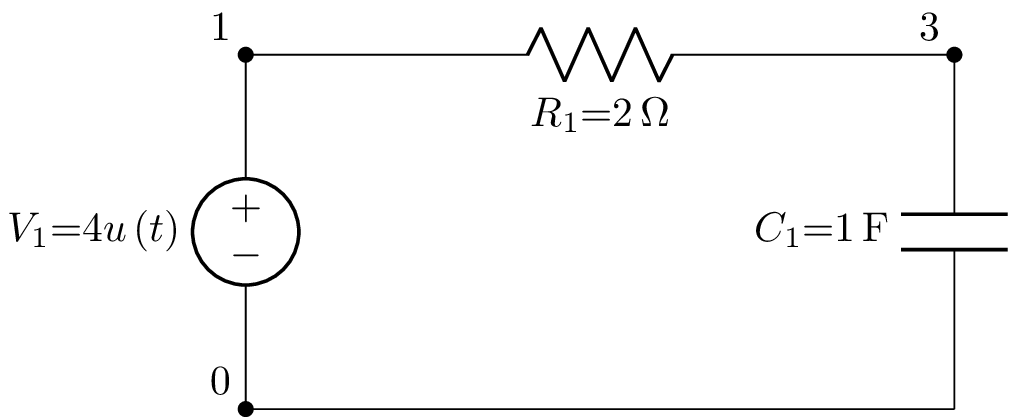

In [2]:
cct1 = Circuit("""
V1 1 0 {4*u(t)}; down=1.5
R1 1 3 2; right=3
C1 3 0_3 1 2; down=1.5
W4 0 0_3; right=3
""")
cct1.draw()

In [3]:
t = np.linspace(0, 10, 1000)
vc1 = cct1.C1.v.evaluate(t)
ic1 = cct1.C1.i.evaluate(t)
vr1 = cct1.R1.v.evaluate(t)

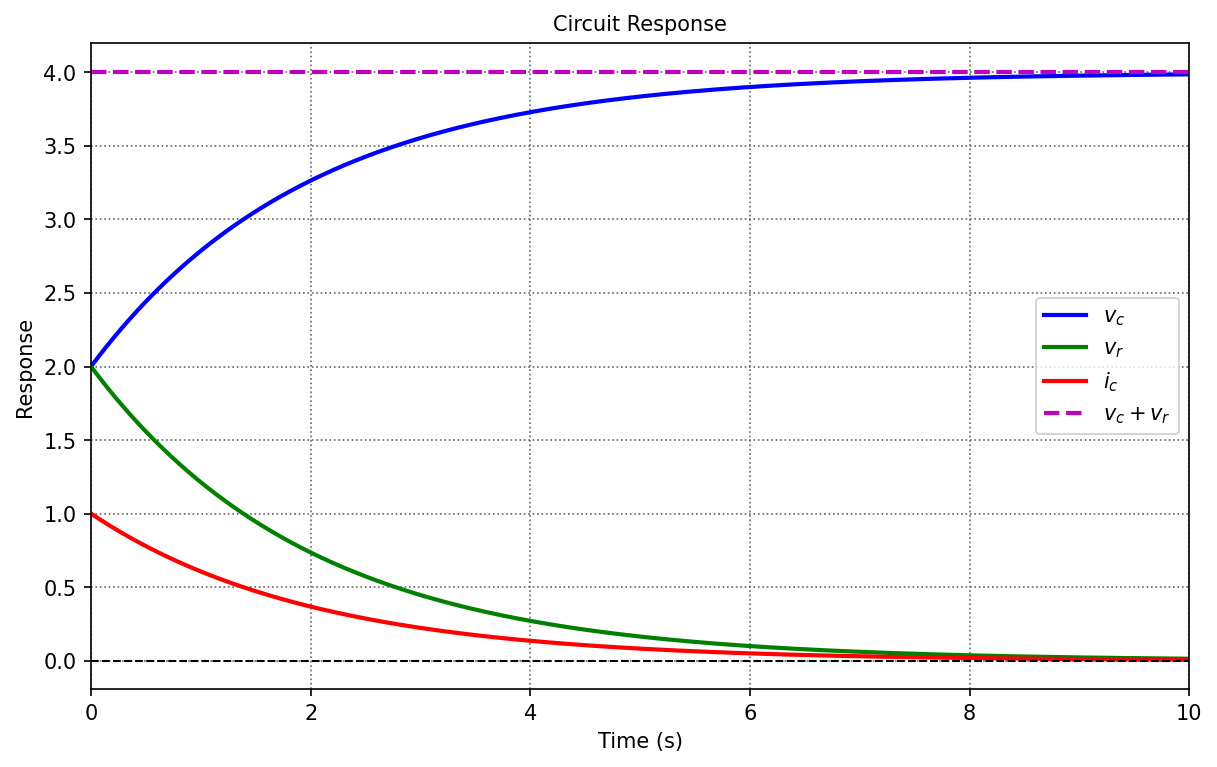

In [4]:
fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vc1, linewidth=2, color='blue', label='$v_c$')
ax.plot(t, vr1, linewidth=2, color='green', label='$v_r$')
ax.plot(t, ic1, linewidth=2, color='red', label='$i_c$')
ax.plot(t, vc1+vr1, 'm--', label='$v_c+v_r$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('figs/circuit-VRC1.png')
plt.show()

In [5]:
cct1.C1.v

       -t            
       ───           
        2            
4 - 2⋅ℯ     for t ≥ 0

# RC Network Example 2

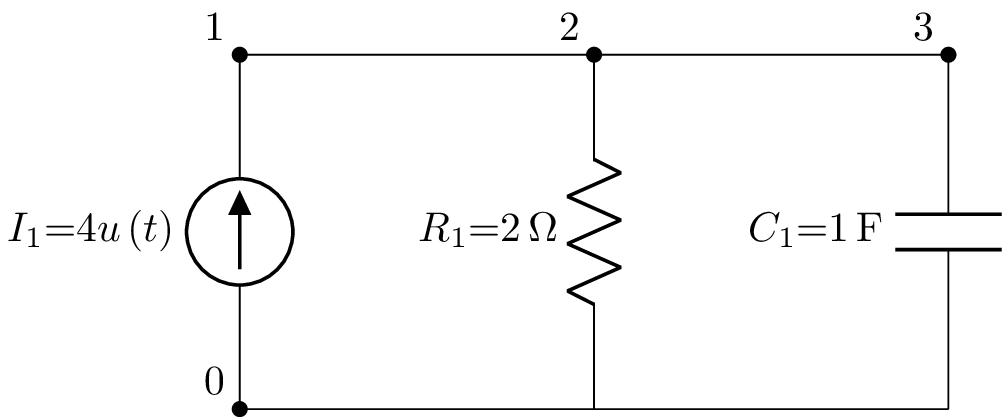

In [6]:
cct2 = Circuit("""
I1 1 0 {4*u(t)}; down=1.5
W1 1 2; right=1.5
R1 2 0_2 2; down=1.5
W2 2 3; right=1.5
C1 3 0_3 1 2; down=1.5
W3 0 0_2; right=1.5
W4 0_2 0_3; right=1.5
""")
cct2.draw()

In [7]:
t = np.linspace(0, 10, 1000)
vc2 = cct2.C1.v.evaluate(t)
ic2 = cct2.C1.i.evaluate(t)
ir2 = cct2.R1.i.evaluate(t)

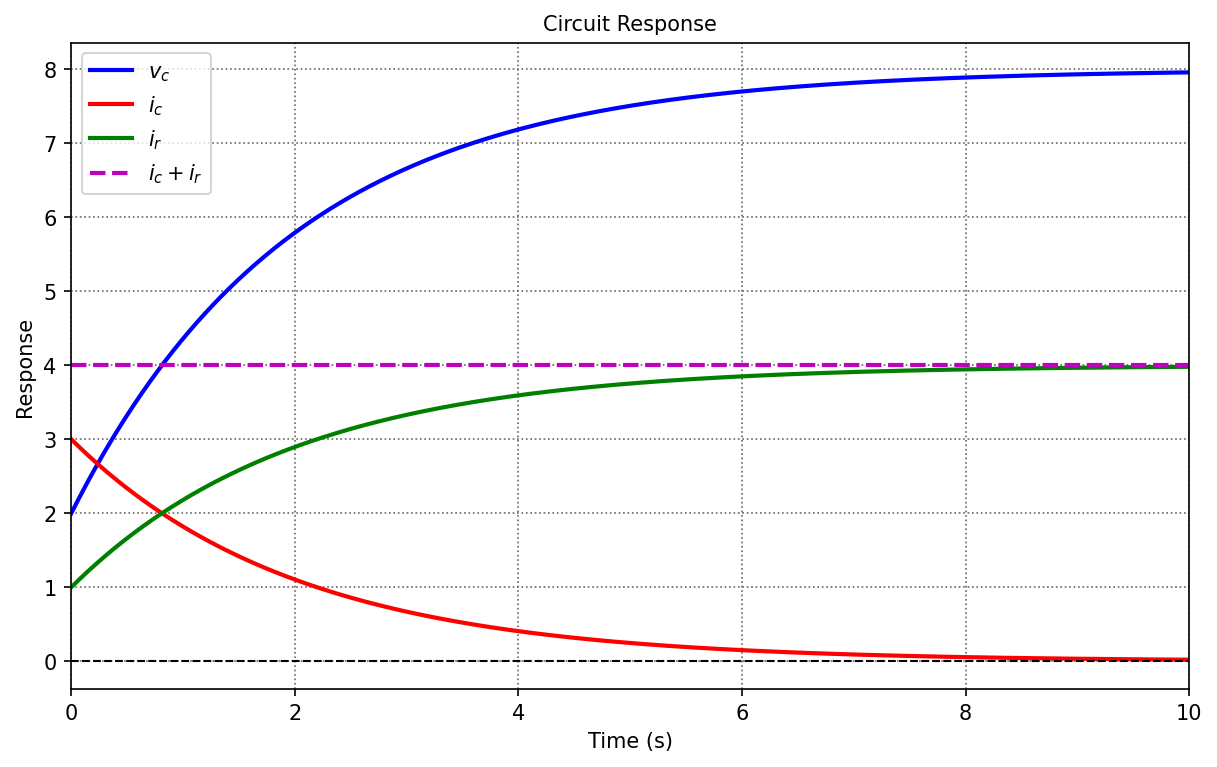

In [8]:
fig = figure(figsize=(8, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vc2, linewidth=2, color='blue', label='$v_c$')
ax.plot(t, ic2, linewidth=2, color='red', label='$i_c$')
ax.plot(t, ir2, linewidth=2, color='green', label='$i_r$')
ax.plot(t, ic2+ir2, 'm--', label='$i_c+i_r$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('figs/circuit-VRC2.png')
plt.show()

In [9]:
cct2.C1.v

       -t            
       ───           
        2            
8 - 6⋅ℯ     for t ≥ 0

# RL Network Example 3

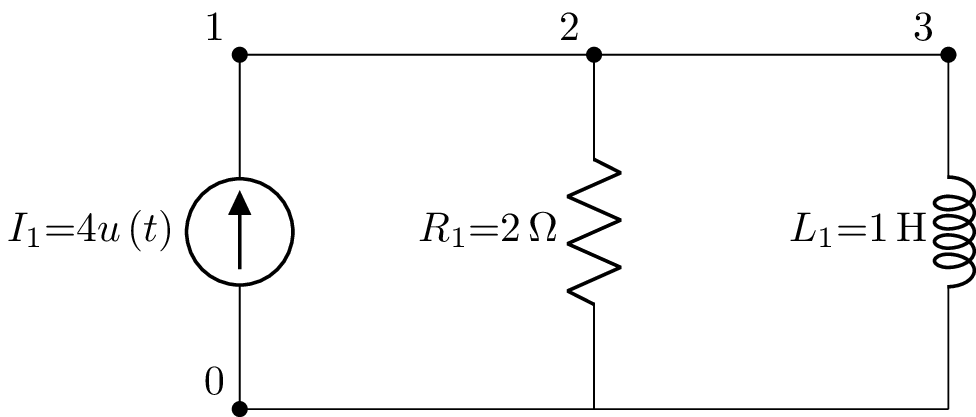

In [10]:
from lcapy import Circuit, s
cct3 = Circuit("""
I1 1 0 {4*u(t)}; down=1.5
W1 1 2; right=1.5
R1 2 0_2 2; down=1.5
W2 2 3; right=1.5
L1 3 0_3 1 2; down=1.5
W3 0 0_2; right=1.5
W4 0_2 0_3; right=1.5
""")
cct3.draw()

In [11]:
t = np.linspace(0, 4, 1000)
vl3 = cct3.L1.v.evaluate(t)
il3 = cct3.L1.i.evaluate(t)
ir3 = cct3.R1.i.evaluate(t)

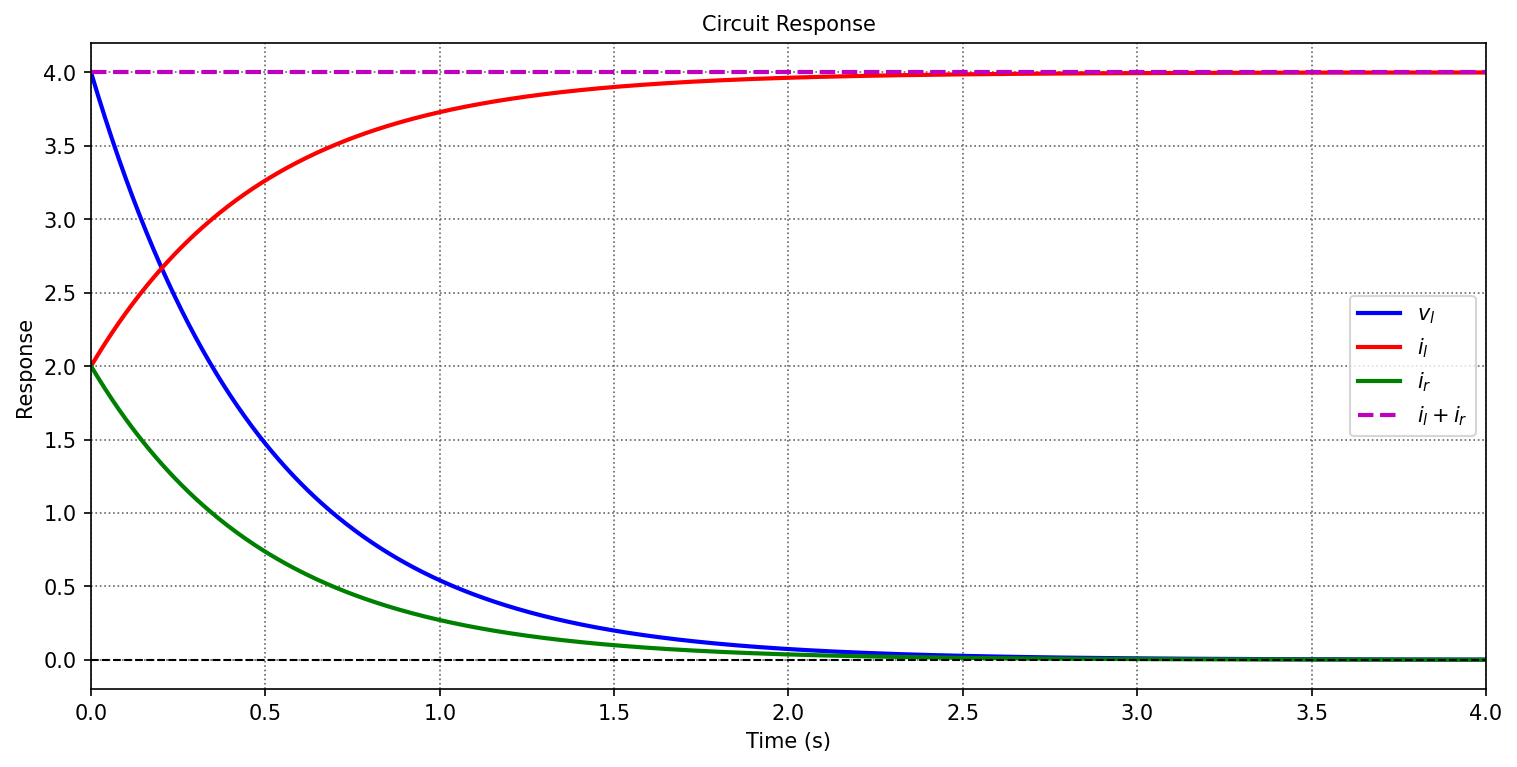

In [12]:
fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vl3, linewidth=2, color='blue', label='$v_l$')
ax.plot(t, il3, linewidth=2, color='red', label='$i_l$')
ax.plot(t, ir3, linewidth=2, color='green', label='$i_r$')
ax.plot(t, il3+ir3, 'm--', label='$i_l+i_r$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('figs/circuit-VRC3.png')
plt.show()

In [13]:
cct3.L1.i

       -2⋅t           
4 - 2⋅ℯ      for t ≥ 0

# RC Network Example 4 (various step inputs)

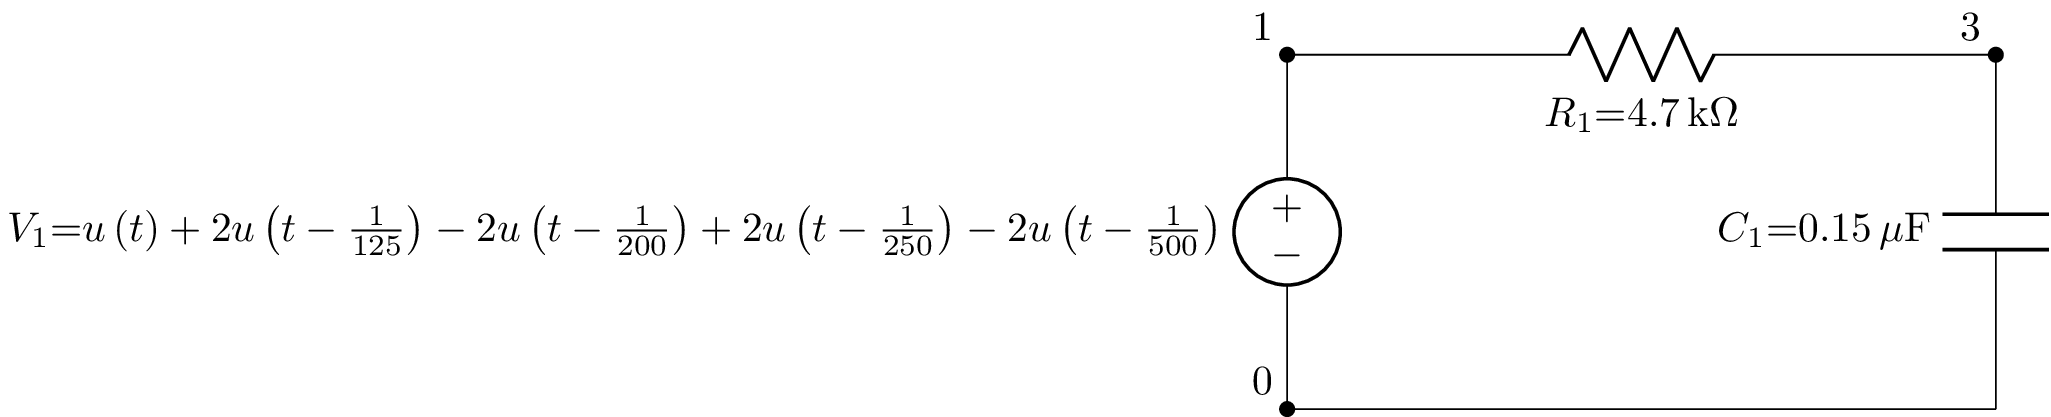

In [14]:
cct4 = Circuit("""
V1 1 0 {(u(t)-2*u(t-2e-3)+2*u(t-4e-3)-2*u(t-5e-3)+2*u(t-8e-3))}; down=1.5
R1 1 3 4.7e3; right=3
C1 3 0_3 150e-9 0; down=1.5
W4 0 0_3; right=3
""")
cct4.draw()

In [15]:
t4 = np.linspace(0,.005, 1000)
vc4 = cct4.C1.v.evaluate(t4)
ic4 = cct4.C1.i.evaluate(t4)
vr4 = cct4.R1.v.evaluate(t4)
v4 = cct4.V1.v.evaluate(t4)
RC = (150e-9) * 4.7e3
print(f"Network value is {RC= :8.6f}")

Network value is RC= 0.000705


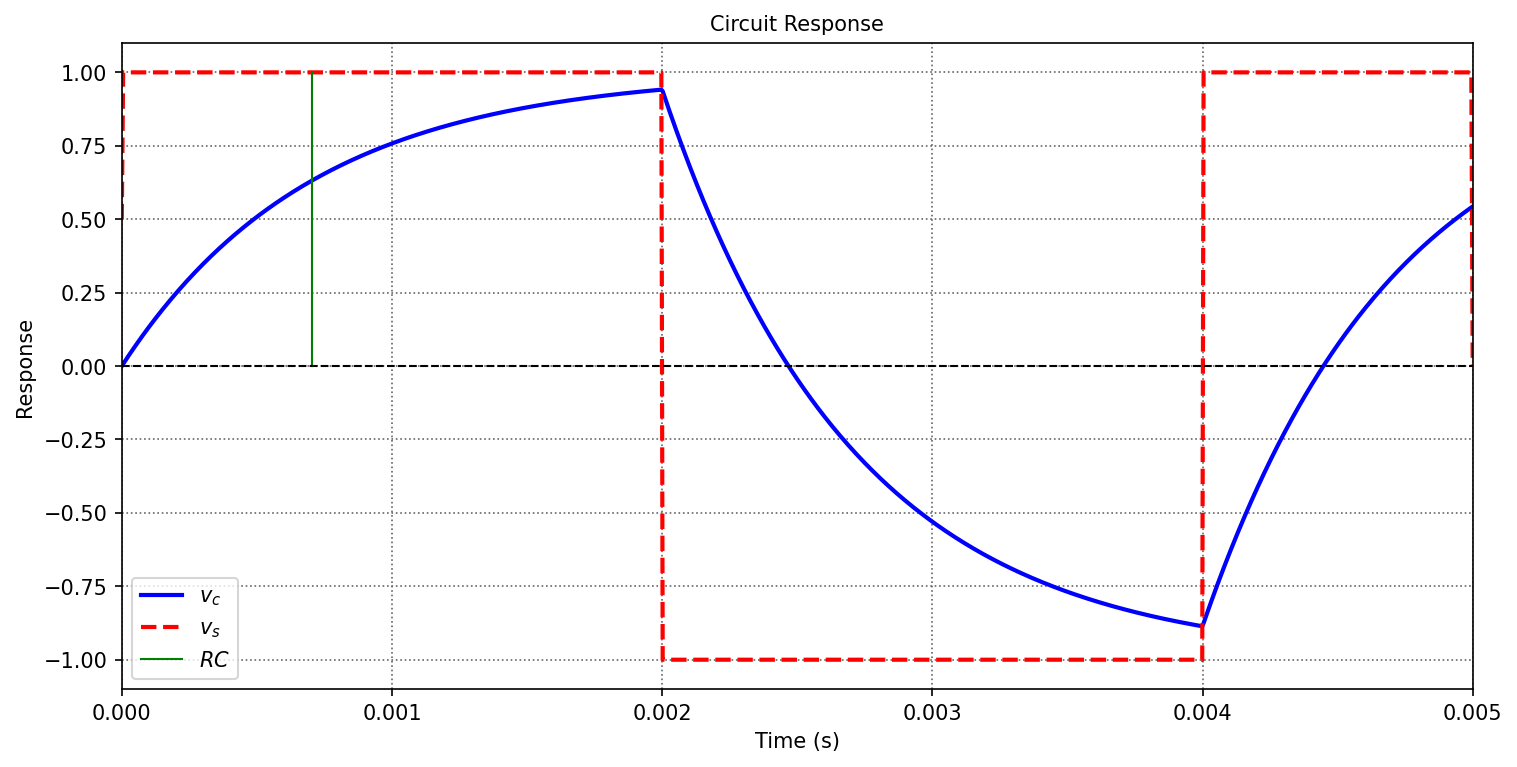

In [16]:
fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t4, vc4, linewidth=2, color='blue', label='$v_c$')
ax.plot(t4, v4, 'r--', linewidth=2, label='$v_s$')
ax.plot([RC, RC], [0, 1], linewidth=1, color='green', label='$t=RC$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('figs/circuit-VRC1.png')
plt.show()

In [17]:
cct4.C1.v

       ⎛          -200000⋅t ⎞               ⎛          800   200000⋅t⎞        
       ⎜          ──────────⎟               ⎜          ─── - ────────⎟        
       ⎜             141    ⎟               ⎜          141     141   ⎟        
       ⎜  1      ℯ          ⎟               ⎜  1      ℯ              ⎟        
200000⋅⎜────── - ───────────⎟⋅u(t) + 200000⋅⎜────── - ───────────────⎟⋅u(t - 1
       ⎝200000      200000  ⎠               ⎝100000        100000    ⎠        

               ⎛          1600   200000⋅t⎞                       ⎛ 400   20000
               ⎜          ──── - ────────⎟                       ⎜ ─── - ─────
               ⎜          141      141   ⎟                       ⎜ 141     141
               ⎜  1      ℯ               ⎟                       ⎜ℯ           
/250) + 200000⋅⎜────── - ────────────────⎟⋅u(t - 1/125) + 200000⋅⎜────────────
               ⎝100000        100000     ⎠                       ⎝     100000 

0⋅t         ⎞                       ⎛ 1000   20000

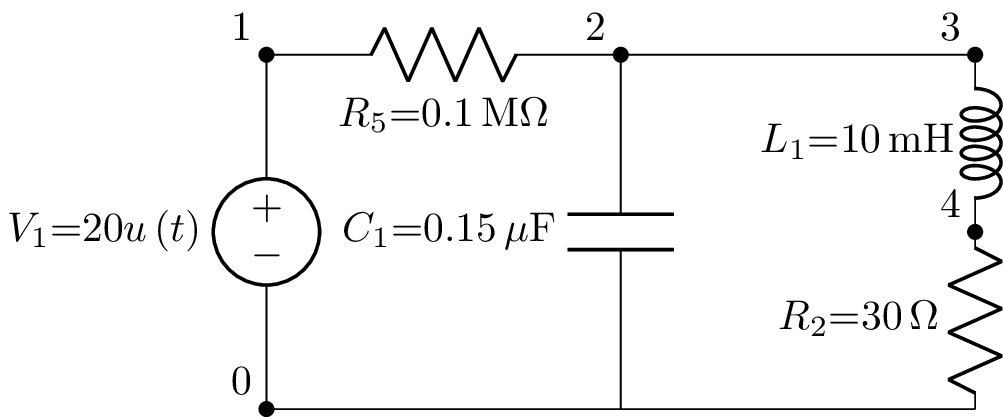

In [18]:
from lcapy import Circuit, s
cct5 = Circuit("""
V1 1 0 {20*u(t)}; down=1.5
R5 1 2 1e5; right=1.5
C1 2 0_2 1.5e-7 20; down=1.5
W2 2 3; right=1.5
L1 3 4 0.01; down=0.75
R2 4 0_3 30; down=0.75
W3 0 0_2; right=1.5
W4 0_2 0_3; right=1.5
""")
cct5.draw()

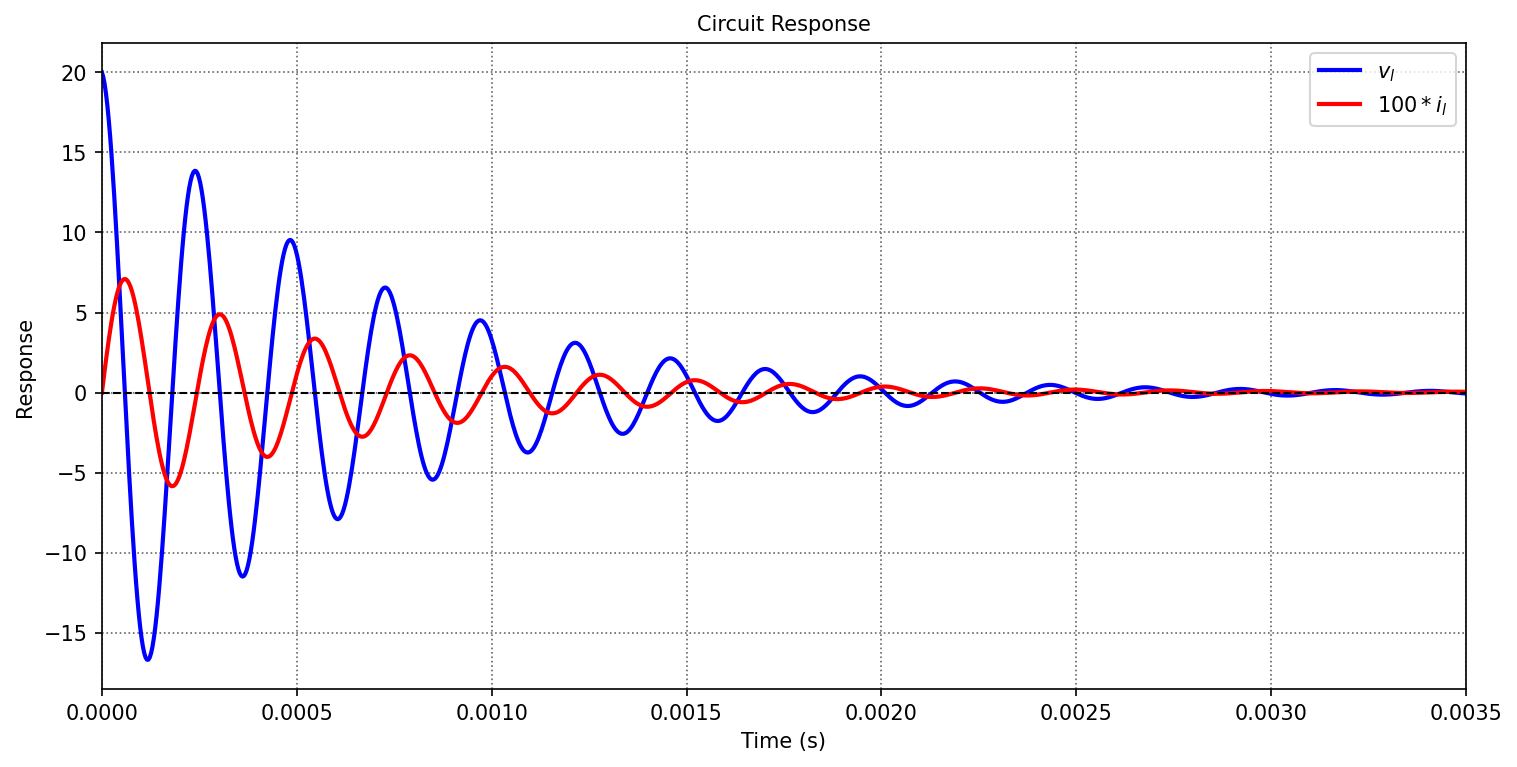

In [19]:
t5 = np.linspace(0,.0035, 1000)
vl5 = cct5.L1.v.evaluate(t5)
il5 = cct5.L1.i.evaluate(t5)
vr5 = cct5.R2.v.evaluate(t5)
vc5 = cct5.C1.v.evaluate(t5)

fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t5, vl5, linewidth=2, color='blue', label='$v_l$')
ax.plot(t5, 100*il5, linewidth=2, color='red', label='$100*i_l$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
#ax.set_ylim([-.1,.1])
nicegrid(ax)
plt.legend()
#savefig('figs/circuit-VRC1.png')
plt.show()

In [20]:
print(cct5.R2.i.evaluate(1).item())
cct5.C1.v.evaluate(1).item()

0.0001999400179946016


In [21]:
20/(1e5+30)